In [39]:
import pandas as pd
import matplotlib as plt
from auto_ts import auto_timeseries

from sklearn.model_selection import train_test_split


In [40]:
source = "Data\RTT-Overview-Timeseries-Covid19-dataset-Sep21_since2003.csv"
#source = "\\Data\\RTT\\RTT-Overview-Timeseries-Sep21.csv"

In [41]:
model = auto_timeseries( score_type='rmse', time_interval='M', non_seasonal_pdq=None, seasonality=True, seasonal_period=12,\
                        model_type=['best'], verbose=2)

In [42]:
target ='No. > 52 weeks'

In [43]:
df= pd.read_csv(source,delimiter=',',parse_dates=True)

df= df.set_index('Date',drop=True)
#df['Date'] = pd.to_datetime(df['Date'])
df.index = pd.to_datetime(df.index)



'only for ML Models'
#X, y = df.iloc[:,:-1],df.iloc[:,-1]

#df = pd.read_csv(source,delimiter=',', usecols=['Date', target],parse_dates=True)
#X['Date'] = pd.to_datetime(df['Date'])
#y['Date'] = pd.to_datetime(df['Date'])


'only for ML Models'

In [44]:
'only for ML Models'
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 shuffle=False)

'only for ML Models'

In [45]:
'only for stats models'
train_df, test_df =train_test_split(df, test_size=0.1, shuffle=False)

<AxesSubplot:xlabel='Date'>

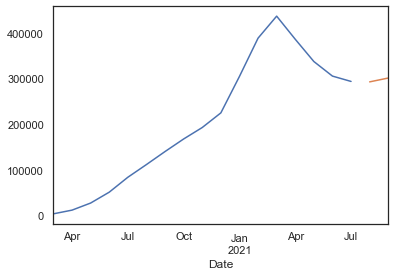

In [46]:
'only for stats models'
#train_df, test_df =train_test_split(df, test_size=0.1, shuffle=False)
train_df['No. > 52 weeks'].plot()
test_df['No. > 52 weeks'].plot()


Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -1.3001475309757347      |
|           p-value           |      0.6291048153773184      |
|          #Lags Used         |             2.0              |
| Number of Observations Used |             14.0             |
|     Critical Value (1%)     |      -4.01203360058309       |
|     Critical Value (5%)     |     -3.1041838775510207      |
|     Critical Value (10%)    |     -2.6909873469387753      |
+-----------------------------+------------------------------+
 this series is non-stationary. Trying test again after differencing...
After differencing=1, results of Augmented Dickey-Fuller Test:
+------------------

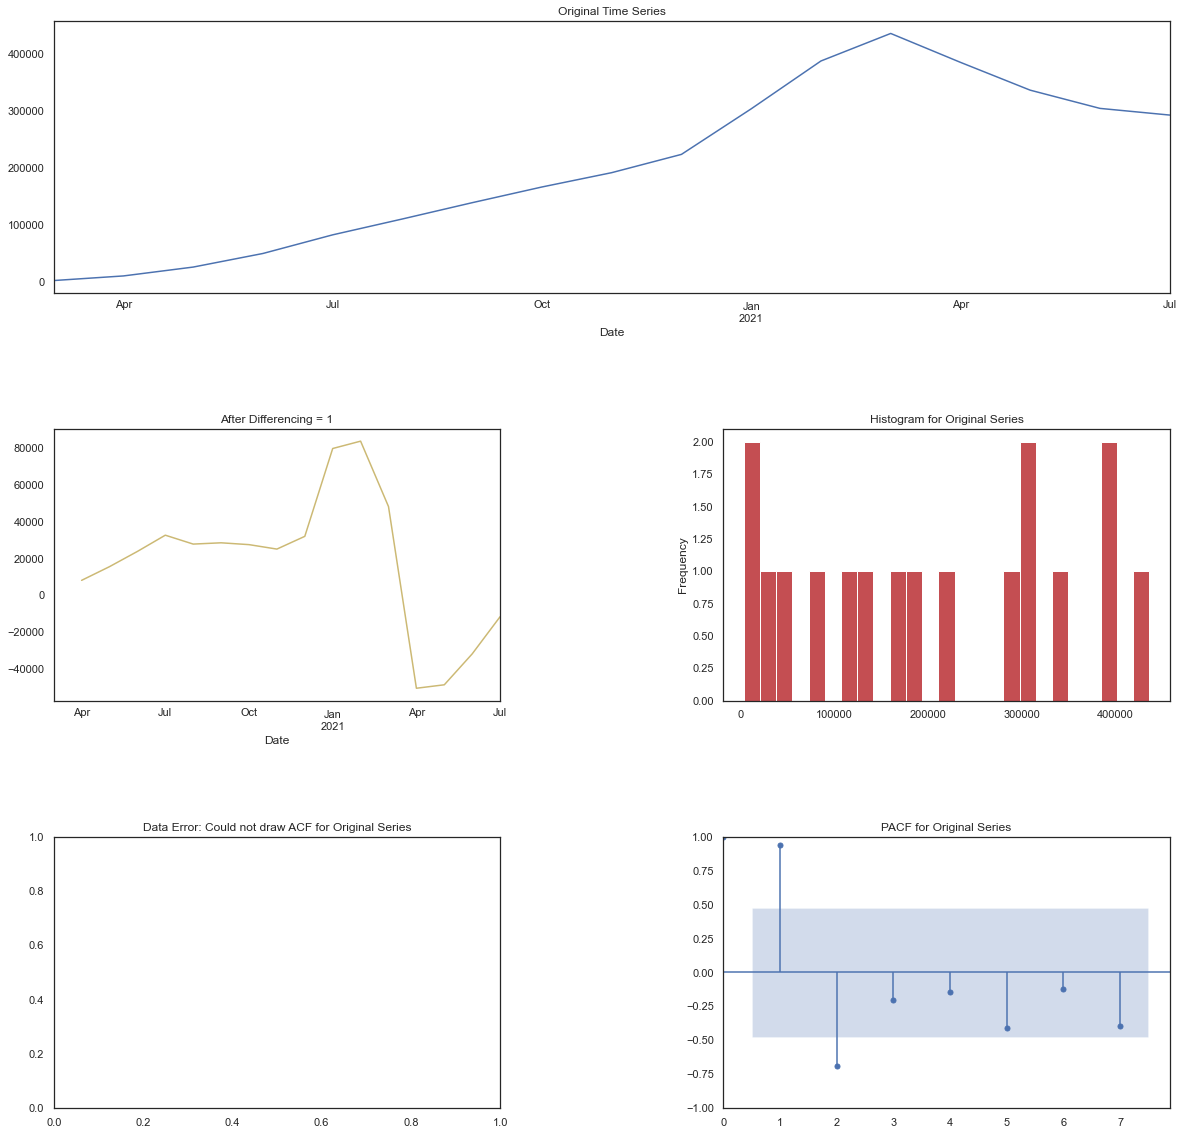

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(17, 5)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Lowering forecast period to 2 to enable cross_validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 7 Test Shape: 2
    RMSE = 11,921.23
    Std Deviation of actuals = 12,551.00
    Normalized RMSE (as pct of std dev) = 95%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 9 Test Shape: 2
    RMSE = 46,853.50
    Std Deviation of actuals = 39,919.50
    Normalized RMSE (as pct of std dev) = 117%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 11 Test Shape: 2
    RMSE = 109,475.01
    Std Deviation of actuals

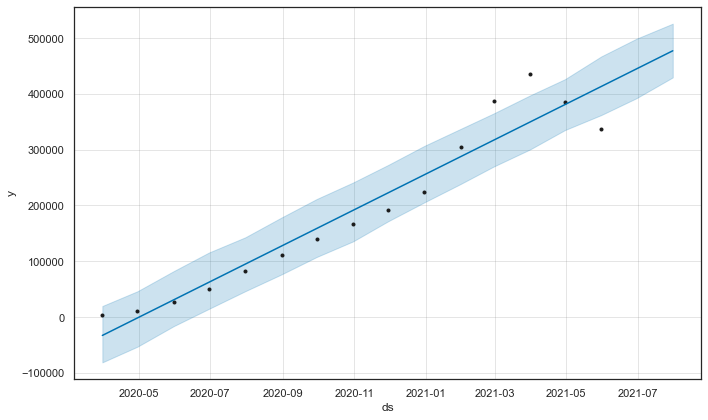

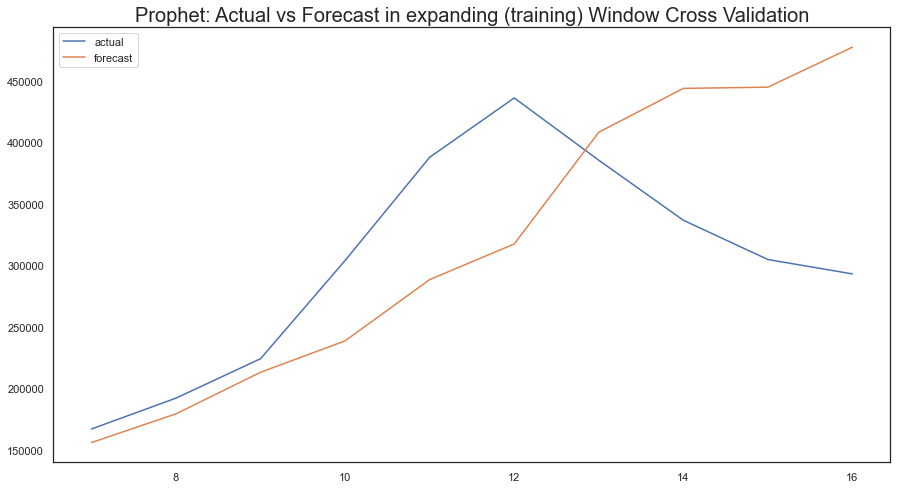

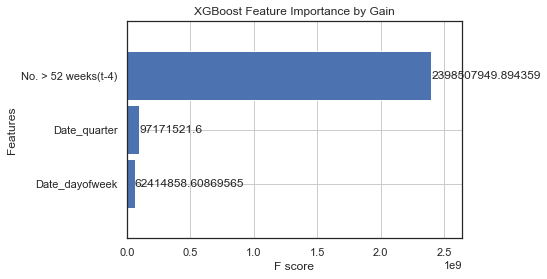

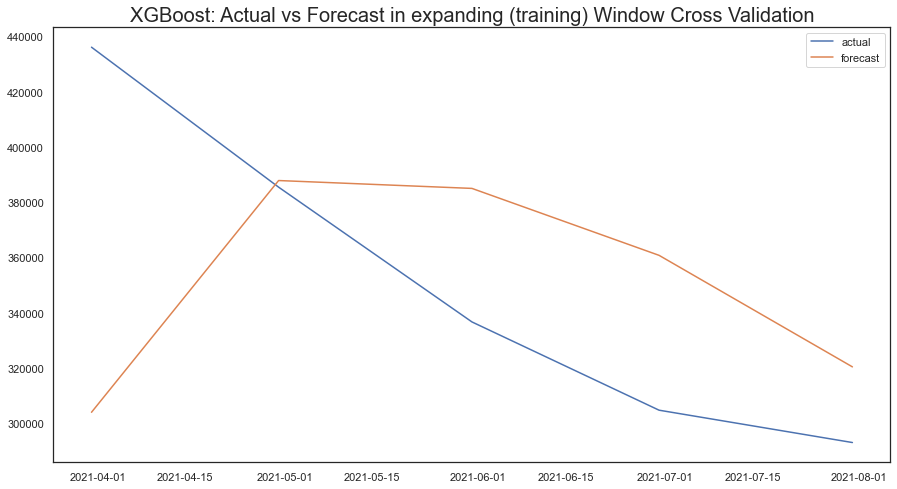

In [47]:
#model = auto_timeseries(forecast_period=15, score_type='rmse', time_interval='M', model_type='best')
model.fit(traindata= train_df, ts_column="Date", target="No. > 52 weeks")

<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

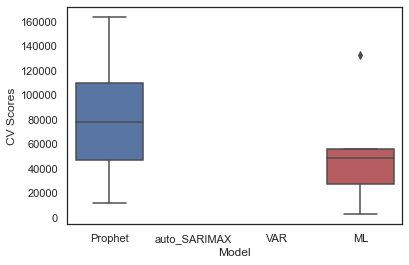

In [48]:
model.get_leaderboard()
model.plot_cv_scores()

In [49]:
test_df

,No. of new RTT periods,ENGLAND COVID-19 related beds,ENGLAND COVID-19 related absences of staff,No. > 52 weeks
Date,,,,
2021-08-31,1469370,6002,14673,292138
2021-09-30,1626514,4916,16122,300566


In [50]:
future_predictions = model.predict(testdata=test_df,model='best')

Predicting using test dataframe as input for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    converting testdata to datetime index erroring. Please check input and try again.
ML predictions completed


In [51]:
future_predictions

,yhat,mean_se,mean_ci_lower,mean_ci_upper
Date,,,,
2021-08-31,262148.0,NaN,NaN,NaN
2021-09-30,262148.0,NaN,NaN,NaN
